In [15]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [17]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [18]:
from citipy import citipy

In [19]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

593

# Getting City Information from API

In [31]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [32]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34fa7e78637ceffa96b9e712da3ad04a


In [33]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | poum
Processing Record 2 of Set 1 | narsaq
Processing Record 3 of Set 1 | kenai
Processing Record 4 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 1 | paamiut
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | cherskiy
Processing Record 9 of Set 1 | qaanaaq
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | ouro preto do oeste
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | san lorenzo
Processing Record 14 of Set 1 | upernavik
Processing Record 15 of Set 1 | golden
Processing Record 16 of Set 1 | puerto suarez
Processing Record 17 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 18 of Set 1 | sao filipe
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | jamestown
Processing Re

Processing Record 39 of Set 4 | sorland
Processing Record 40 of Set 4 | bredasdorp
Processing Record 41 of Set 4 | karauzyak
City not found. Skipping...
Processing Record 42 of Set 4 | hami
Processing Record 43 of Set 4 | mount gambier
Processing Record 44 of Set 4 | gravdal
Processing Record 45 of Set 4 | la merced
Processing Record 46 of Set 4 | uniara
Processing Record 47 of Set 4 | turukhansk
Processing Record 48 of Set 4 | moron
Processing Record 49 of Set 4 | mahebourg
Processing Record 50 of Set 4 | longyearbyen
Processing Record 1 of Set 5 | gunjur
Processing Record 2 of Set 5 | lolua
City not found. Skipping...
Processing Record 3 of Set 5 | kidal
Processing Record 4 of Set 5 | bad freienwalde
Processing Record 5 of Set 5 | auki
Processing Record 6 of Set 5 | slave lake
Processing Record 7 of Set 5 | mana
Processing Record 8 of Set 5 | half moon bay
Processing Record 9 of Set 5 | port moresby
Processing Record 10 of Set 5 | amderma
City not found. Skipping...
Processing Record

Processing Record 27 of Set 8 | ulundi
Processing Record 28 of Set 8 | port-gentil
Processing Record 29 of Set 8 | luanda
Processing Record 30 of Set 8 | ribeira brava
Processing Record 31 of Set 8 | tarauaca
Processing Record 32 of Set 8 | coffs harbour
Processing Record 33 of Set 8 | ambulu
Processing Record 34 of Set 8 | san patricio
Processing Record 35 of Set 8 | codrington
Processing Record 36 of Set 8 | deventer
Processing Record 37 of Set 8 | madimba
Processing Record 38 of Set 8 | krasnoselkup
Processing Record 39 of Set 8 | malibu
Processing Record 40 of Set 8 | pangody
Processing Record 41 of Set 8 | chicama
Processing Record 42 of Set 8 | sebinkarahisar
Processing Record 43 of Set 8 | cam ranh
Processing Record 44 of Set 8 | aksarka
Processing Record 45 of Set 8 | praxedis guerrero
Processing Record 46 of Set 8 | nara
Processing Record 47 of Set 8 | sao gabriel
Processing Record 48 of Set 8 | santiago del estero
Processing Record 49 of Set 8 | attawapiskat
City not found. S

Processing Record 17 of Set 12 | karaul
City not found. Skipping...
Processing Record 18 of Set 12 | voi
Processing Record 19 of Set 12 | buarcos
Processing Record 20 of Set 12 | havoysund
Processing Record 21 of Set 12 | saint-joseph
Processing Record 22 of Set 12 | surin
Processing Record 23 of Set 12 | zabid
Processing Record 24 of Set 12 | ilebo
Processing Record 25 of Set 12 | sarahan
Processing Record 26 of Set 12 | emirdag
Processing Record 27 of Set 12 | nguiu
City not found. Skipping...
Processing Record 28 of Set 12 | matsanga
City not found. Skipping...
Processing Record 29 of Set 12 | plainview
Processing Record 30 of Set 12 | langham
Processing Record 31 of Set 12 | batagay
Processing Record 32 of Set 12 | puerto ayacucho
Processing Record 33 of Set 12 | manokwari
Processing Record 34 of Set 12 | severnyy
Processing Record 35 of Set 12 | gardelegen
Processing Record 36 of Set 12 | guarapari
Processing Record 37 of Set 12 | millerovo
Processing Record 38 of Set 12 | alice s

In [34]:
city_data

[{'City': 'Poum',
  'Lat': -20.2333,
  'Lng': 164.0167,
  'Max Temp': 75.02,
  'Humidity': 75,
  'Cloudiness': 0,
  'Wind Speed': 4.81,
  'Country': 'NC',
  'Date': '2021-06-14 02:03:26'},
 {'City': 'Narsaq',
  'Lat': 60.9167,
  'Lng': -46.05,
  'Max Temp': 43.02,
  'Humidity': 83,
  'Cloudiness': 15,
  'Wind Speed': 3.42,
  'Country': 'GL',
  'Date': '2021-06-14 02:03:26'},
 {'City': 'Kenai',
  'Lat': 60.5544,
  'Lng': -151.2583,
  'Max Temp': 65.03,
  'Humidity': 62,
  'Cloudiness': 0,
  'Wind Speed': 13.38,
  'Country': 'US',
  'Date': '2021-06-14 02:03:08'},
 {'City': 'Paamiut',
  'Lat': 61.994,
  'Lng': -49.6678,
  'Max Temp': 37.96,
  'Humidity': 89,
  'Cloudiness': 25,
  'Wind Speed': 10.56,
  'Country': 'GL',
  'Date': '2021-06-14 02:03:27'},
 {'City': 'Bluff',
  'Lat': -46.6,
  'Lng': 168.3333,
  'Max Temp': 49.8,
  'Humidity': 89,
  'Cloudiness': 97,
  'Wind Speed': 4.85,
  'Country': 'NZ',
  'Date': '2021-06-14 02:03:28'},
 {'City': 'Rikitea',
  'Lat': -23.1203,
  'Lng': -13

In [35]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Poum,-20.2333,164.0167,75.02,75,0,4.81,NC,2021-06-14 02:03:26
1,Narsaq,60.9167,-46.0500,43.02,83,15,3.42,GL,2021-06-14 02:03:26
2,Kenai,60.5544,-151.2583,65.03,62,0,13.38,US,2021-06-14 02:03:08
3,Paamiut,61.9940,-49.6678,37.96,89,25,10.56,GL,2021-06-14 02:03:27
4,Bluff,-46.6000,168.3333,49.80,89,97,4.85,NZ,2021-06-14 02:03:28
5,Rikitea,-23.1203,-134.9692,75.38,74,100,13.65,PF,2021-06-14 02:03:28
6,Cherskiy,68.7500,161.3000,64.06,30,52,6.42,RU,2021-06-14 02:03:28
7,Qaanaaq,77.4840,-69.3632,32.36,76,73,2.80,GL,2021-06-14 02:03:29
8,Yellowknife,62.4560,-114.3525,64.80,53,1,11.81,CA,2021-06-14 02:01:26
9,Ouro Preto Do Oeste,-10.7481,-62.2158,73.89,69,26,3.27,BR,2021-06-14 02:03:29


In [36]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

In [39]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Poum,NC,2021-06-14 02:03:26,-20.2333,164.0167,75.02,75,0,4.81
1,Narsaq,GL,2021-06-14 02:03:26,60.9167,-46.0500,43.02,83,15,3.42
2,Kenai,US,2021-06-14 02:03:08,60.5544,-151.2583,65.03,62,0,13.38
3,Paamiut,GL,2021-06-14 02:03:27,61.9940,-49.6678,37.96,89,25,10.56
4,Bluff,NZ,2021-06-14 02:03:28,-46.6000,168.3333,49.80,89,97,4.85


In [40]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Making Some Graphs

In [41]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


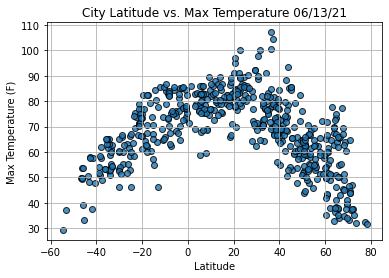

In [43]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


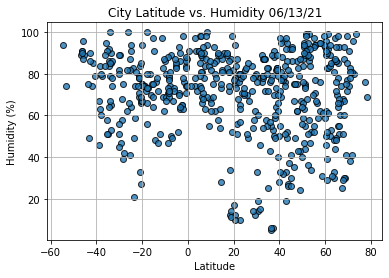

In [44]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

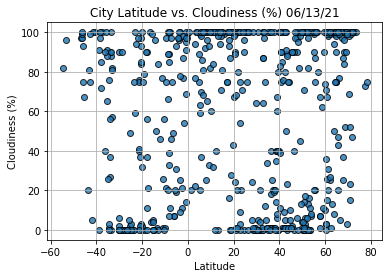

In [45]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

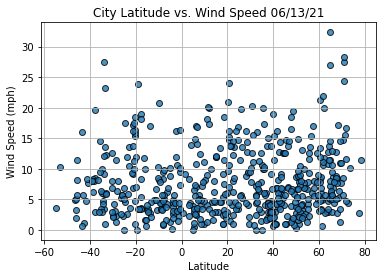

In [46]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()
